### 데이터 불러오기

In [2]:
import pandas as pd

gdp = pd.read_excel('1990-2017_한중일_1인당gdp.xlsx')
co2 = pd.read_excel('1990-2017_한중일_CO2.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './1990-2017_한중일_1인당gdp.xlsx'

### 데이터 결합을 위한 형태 변경

In [13]:
gdp_df = pd.melt(gdp,id_vars=['Country Code'])
co2_df = pd.melt(co2,id_vars=['국가별'])

In [14]:
gdp_df.columns = ['country','year','gdp']
co2_df.columns = ['country','year','co2']

In [17]:
co2_df

,country,year,co2
0,CHN,1990,231.8
1,JPN,1990,2122.2
2,KOR,1990,1042.3
3,CHN,1991,255.8
4,JPN,1991,2237.1
...,...,...,...
79,JPN,2016,9109.2
80,KOR,2016,1146.9
81,CHN,2017,600.0
82,JPN,2017,9302.0


### 데이터 결합을 위한 형태 2차 변경

In [16]:
co2_df['country'] = gdp_df['country'].str.replace('중국','CHN')
co2_df['country'] = gdp_df['country'].str.replace('일본','JPN')
co2_df['country'] = gdp_df['country'].str.replace('한국','KOR')
gdp_df['year'] = gdp_df['year'].str[:4]

### 데이터 join

In [18]:
df = co2_df.merge(gdp_df,on=['country','year'])

### gdp와 co2의 산포도 - 전체

gdp와 co2의 상관계수 :  0.79


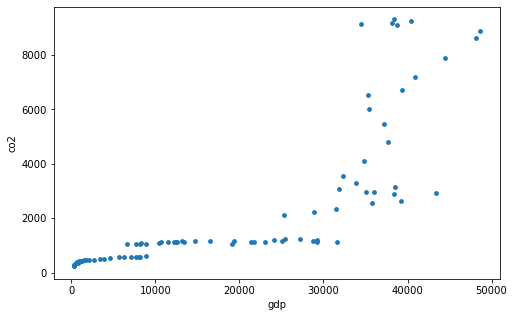

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
df.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(df.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

-> 0.79로 높은 상관성을 가지고 있음

In [20]:
df.year = pd.to_datetime(df.year)
df.set_index('year', inplace=True)

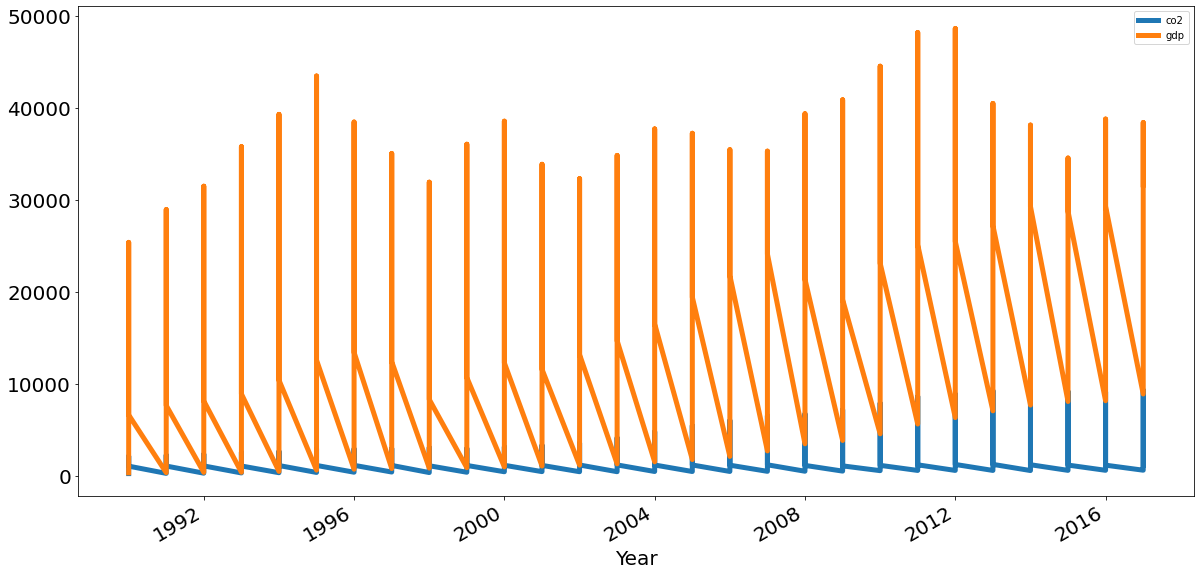

In [22]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### gdp 12년 이동평균 - 전체

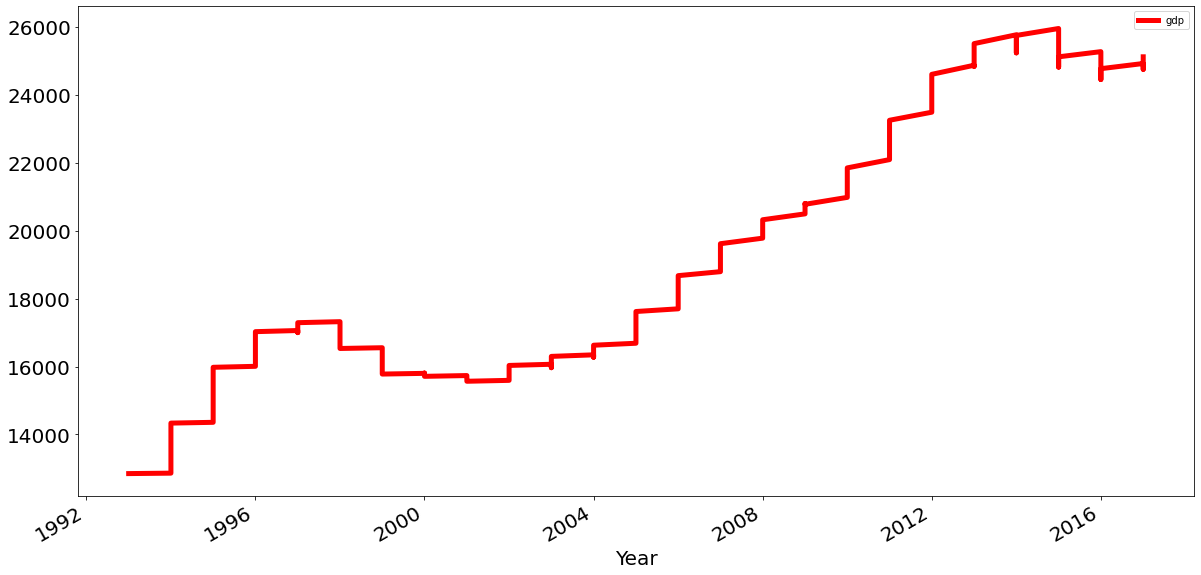

In [23]:
gdp = df[['gdp']]
gdp.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

### co2 12년 이동평균 - 전체

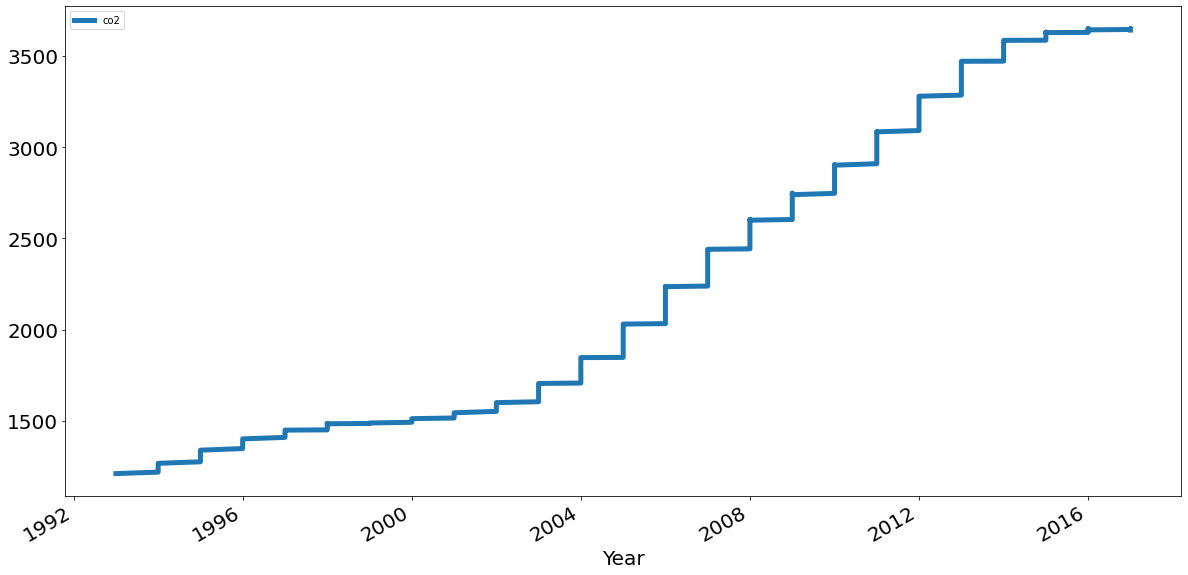

In [24]:
co2 = df[['co2']]
co2.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

### 국가별 데이터 분리
중국

In [25]:
china = df[df['country']=='CHN']
korea = df[df['country']=='KOR']
japan = df[df['country']=='JPN']

gdp와 co2의 상관계수 :  0.88


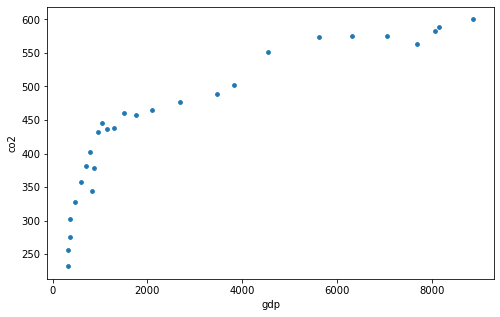

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
china.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(china.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

-> 중국 GDP,co2 상관 계수가 높음, 0.88

일본

gdp와 co2의 상관계수 :  0.57


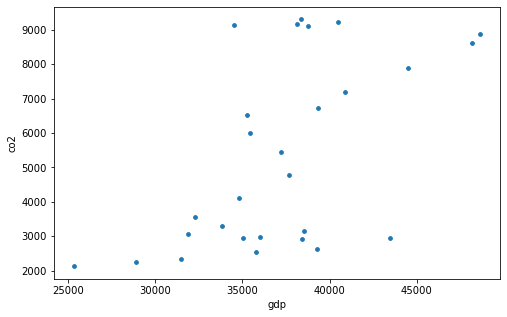

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
japan.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(japan.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

gdp와 co2의 상관계수 :  0.69


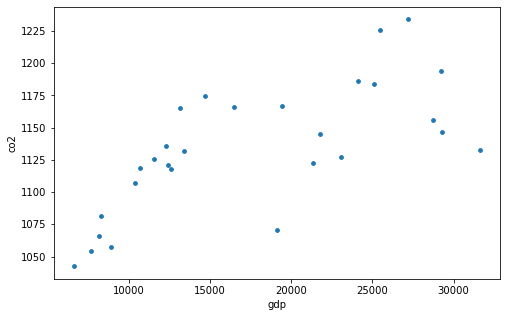

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [8, 5]
korea.plot.scatter(x='gdp',
                     y='co2',s=14)

corr_gdp_with_co2 = round(korea.corr().iloc[0,1],2)
print('gdp와 co2의 상관계수 : ',corr_gdp_with_co2)

-> 한국 0.69

#### 중국 3년 gdp,co2 이동평균

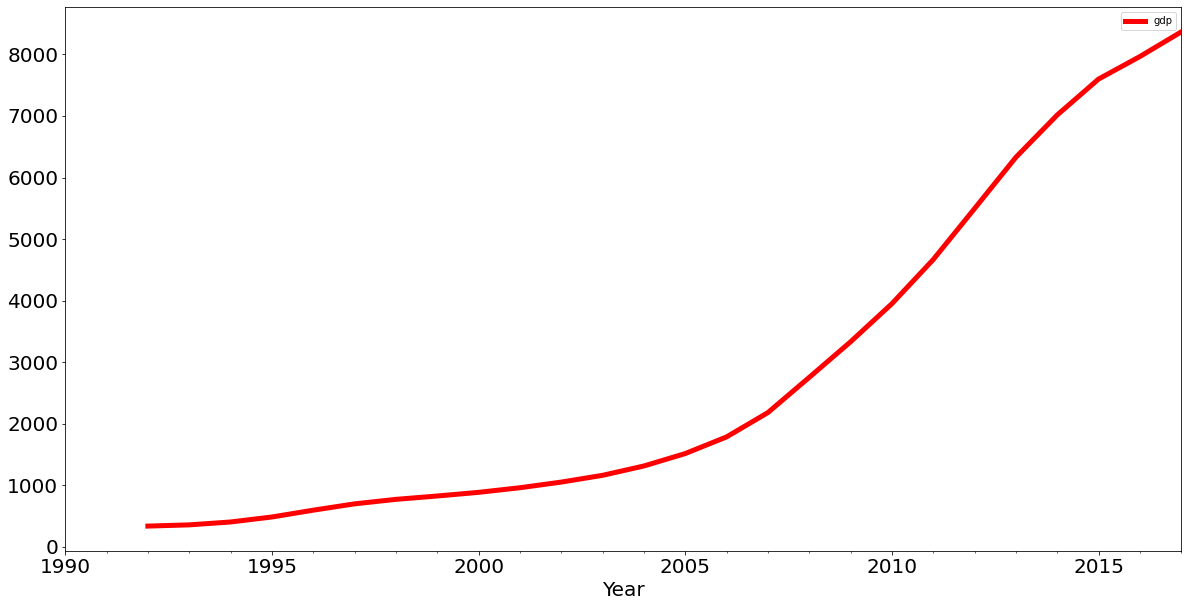

In [29]:
gdp = china[['gdp']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

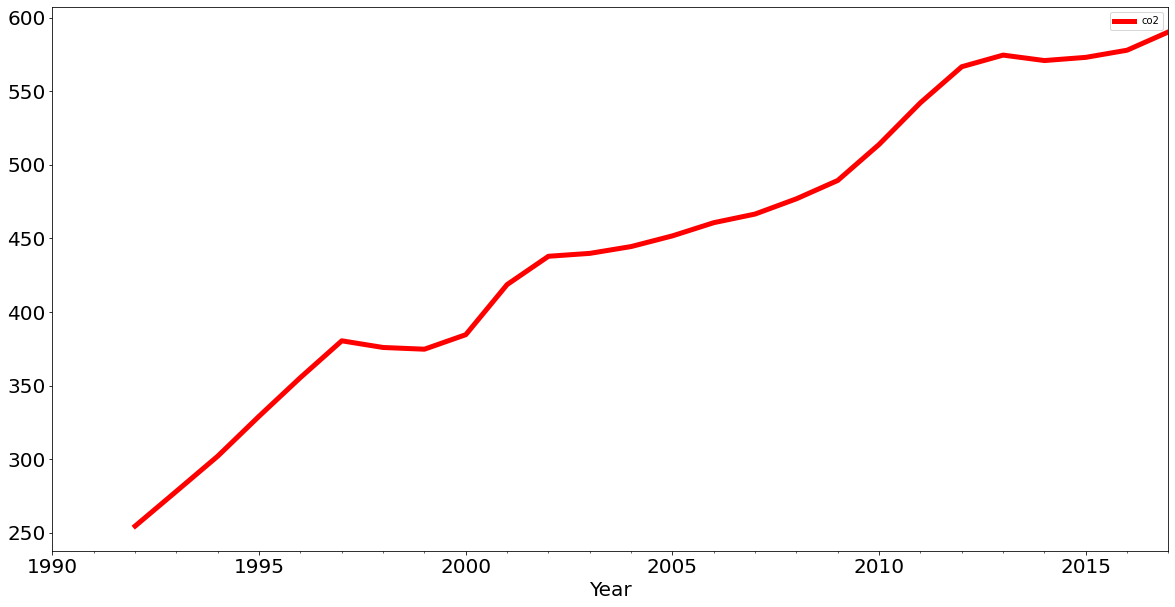

In [30]:
gdp = china[['co2']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

#### 일본 3년 gdp,co2 이동평균

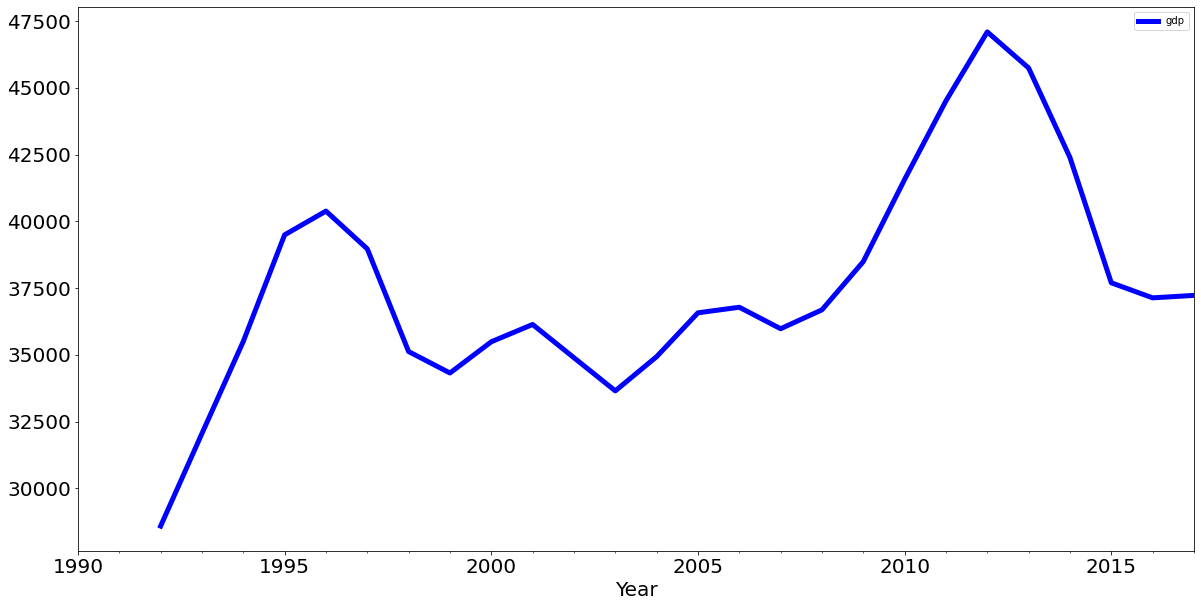

In [31]:
gdp = japan[['gdp']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

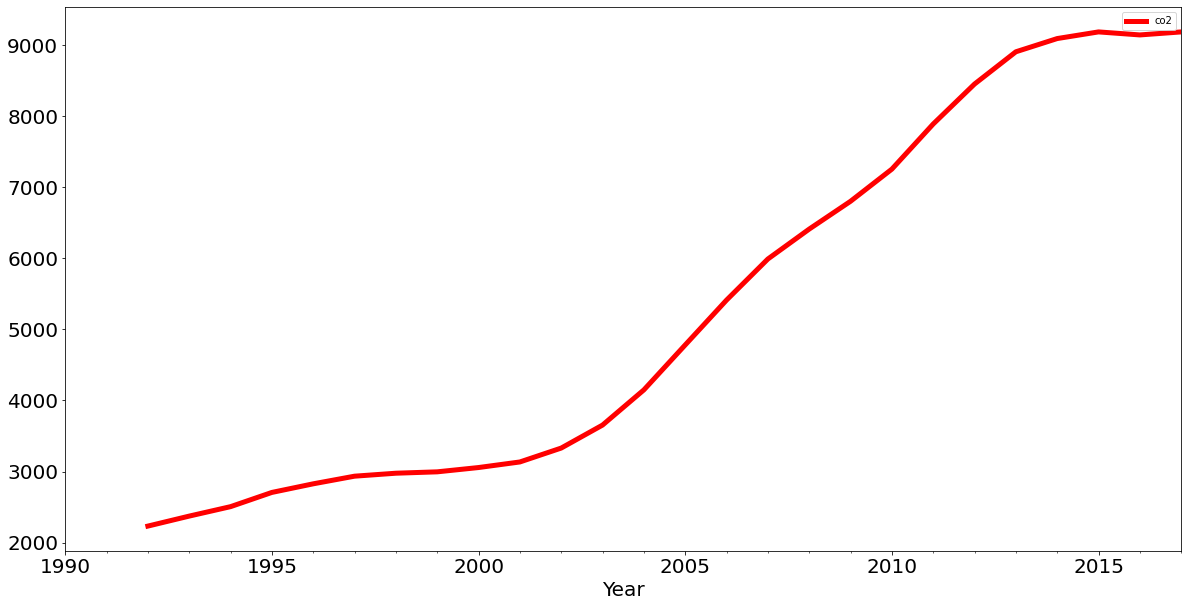

In [32]:
co2 = japan[['co2']]
co2.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

#### 한국 3년 gdp,co2 이동평균

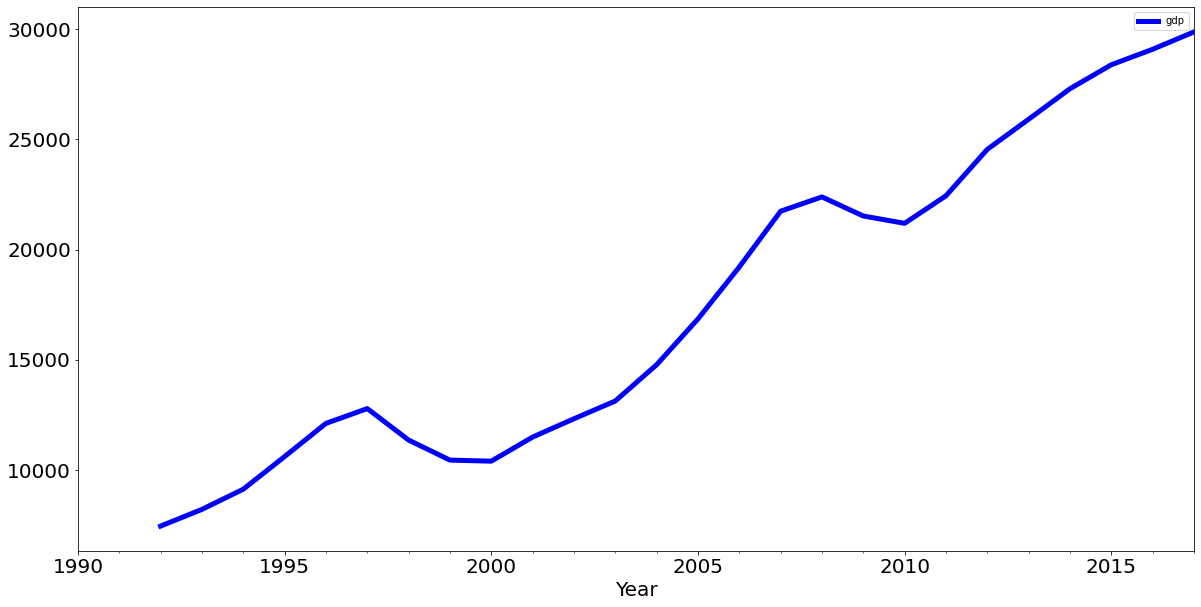

In [33]:
gdp = korea[['gdp']]
gdp.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='blue',)
plt.xlabel('Year', fontsize=20);

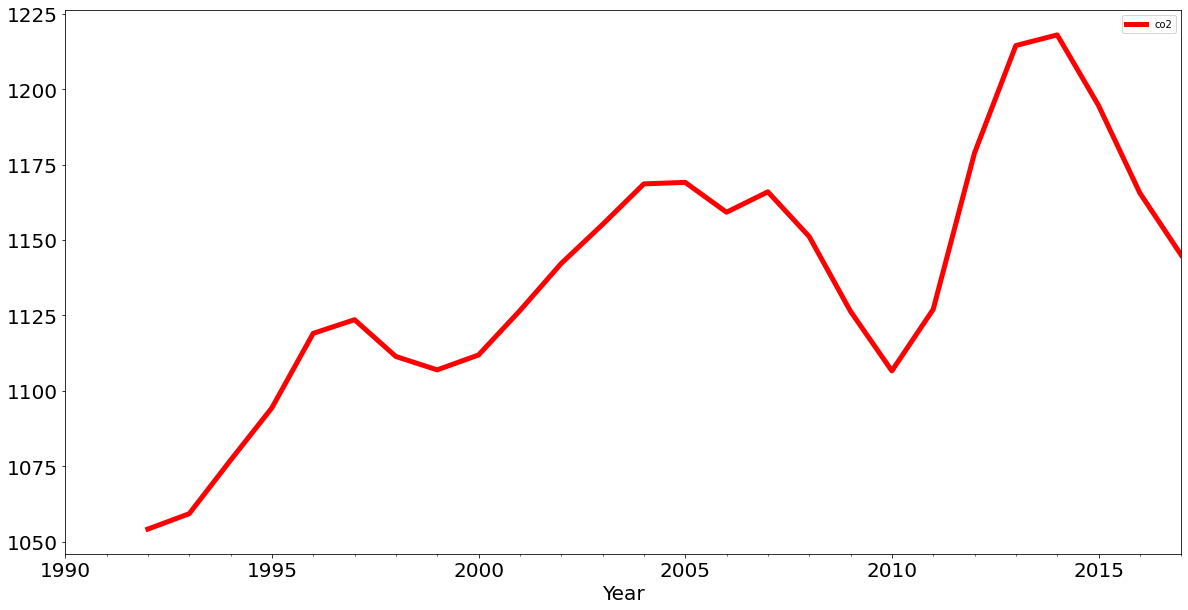

In [34]:
co2 = korea[['co2']]
co2.rolling(3).mean().plot(figsize=(20,10), linewidth=5, fontsize=20,color='red',)
plt.xlabel('Year', fontsize=20);

In [78]:
import statsmodels.api as sm

china_co2 = china.loc[:, 'co2']
china_co2 = china_co2.to_frame()

china_gdp = china.loc[:, 'gdp']
china_gdp_sq = china.loc[:, 'gdp_sq']
x_china = pd.concat([china_gdp, china_gdp_sq],axis=1)
X_china = sm.add_constant(x_china)

y = china_co2

kuznets_china = sm.OLS(y, X_china)
kuznets_china_fit = kuznets_china.fit()
kuznets_china_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     89.34
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           4.10e-12
Time:                        00:16:18   Log-Likelihood:                -141.11
No. Observations:                  28   AIC:                             288.2
Df Residuals:                      25   BIC:                             292.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        297.6415     15.301     19.452      0.000     266.129     329.154
gdp            0.0872      0.012      7.368      0.000       0.063       0.112
gdp_sq     -6.459e-06   1.38e-06     -4.695      0.000   -9.29e-06   -3.63e-06
==============================================================================
Omnibus:                        1.040   Durbin-Watson:                   0.356
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.757
Skew:                          -0.393   Prob(JB):                        0.685
Kurtosis:                       2.820   Cond. No.                     6.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
import warnings
warnings.filterwarnings("ignore")

japan_co2 = japan.loc[:, 'co2']
japan_co2 = japan_co2.to_frame()

japan.loc[:, 'gdp_sq'] = japan.loc[:, 'gdp'] **2

japan_gdp = japan.loc[:, 'gdp']
japan_gdp_sq = japan.loc[:, 'gdp_sq']
x_japan = pd.concat([japan_gdp, japan_gdp_sq],axis=1)
X_japan = sm.add_constant(x_japan)

y = japan_co2

kuznets_japan = sm.OLS(y, X_japan)
kuznets_japan_fit = kuznets_japan.fit()
kuznets_japan_fit.summary()

NameError: name 'japan' is not defined

In [89]:
korea_co2 = korea.loc[:, 'co2']
korea_co2 = korea_co2.to_frame()

korea.loc[:, 'gdp_sq'] = korea.loc[:, 'gdp'] **2

korea_gdp = korea.loc[:, 'gdp']
korea_gdp_sq = korea.loc[:, 'gdp_sq']
x_korea = pd.concat([korea_gdp, korea_gdp_sq],axis=1)
X_korea = sm.add_constant(x_korea)

y = korea_co2

kuznets_korea = sm.OLS(y, X_korea)
kuznets_korea_fit = kuznets_korea.fit()
kuznets_korea_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    co2   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     17.68
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.64e-05
Time:                        00:22:27   Log-Likelihood:                -136.19
No. Observations:                  28   AIC:                             278.4
Df Residuals:                      25   BIC:                             282.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        955.5171     42.023     22.738      0.000     868.969    1042.065
gdp            0.0175      0.005      3.431      0.002       0.007       0.028
gdp_sq     -3.531e-07   1.35e-07     -2.611      0.015   -6.32e-07   -7.46e-08
==============================================================================
Omnibus:                        4.432   Durbin-Watson:                   0.761
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.759
Skew:                          -0.561   Prob(JB):                        0.252
Kurtosis:                       4.051   Cond. No.                     3.14e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
korea

,country,co2,gdp,gdp_sq
year,,,,
1990-01-01,KOR,1042.3,6610.036508,4.369258e+07
1991-01-01,KOR,1054.0,7636.982429,5.832350e+07
1992-01-01,KOR,1066.1,8126.670390,6.604277e+07
1993-01-01,KOR,1057.6,8884.928319,7.894195e+07
1994-01-01,KOR,1107.2,10385.336168,1.078552e+08
1995-01-01,KOR,1118.2,12564.778134,1.578736e+08
1996-01-01,KOR,1131.7,13403.049586,1.796417e+08
1997-01-01,KOR,1120.8,12398.480028,1.537223e+08
1998-01-01,KOR,1081.6,8281.699982,6.858655e+07


-> 한국같은 경우 근3년간 GDP의 평균 이동평균이 증가하고 있지만, co2 량은 감소하는 모습을 볼 수 있음